<a href="https://colab.research.google.com/github/Venture-Coding/SUNY-Buffalo-ML-and-self-learning/blob/main/NLP/NLP_based_Real_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case:  
The business case at hand is a case of targeted analytics. A research firm A wants to understand what firm B has published online. Based on these analytics, the firm A shall then decide its course of action with regards to firm A. 

This case is so relevant to any pair of business that are either partners, have vendor-client relations, are proposed consulting advisors or any form of relation, even competitors that adjust strategies based on fellow competitors.

## Understanding the Data

In [12]:
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv("intern.csv")
url1 = "https://insights.blackcoffer.com/detect-data-exfiltration-over-the-network/"
data.head()

,URL_ID,URL
0,1,https://insights.blackcoffer.com/how-is-login-...
1,2,https://insights.blackcoffer.com/how-does-ai-h...
2,3,https://insights.blackcoffer.com/ai-and-its-im...
3,4,https://insights.blackcoffer.com/how-do-deep-l...
4,5,https://insights.blackcoffer.com/how-artificia...


We have a list of all urls, the data from which is to be analysed.

### Scraping for Data Collection

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

# header to avoid being suspicious to the mod_security of the website.
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0', }
ps = requests.get(url1, headers=header)
page_source = BeautifulSoup(ps.text, 'html.parser')
# print(page_source)
title = page_source.find('h1').get_text()
# print(page_source.title.get_text())
body = page_source.find('div', class_='td-post-content').get_text()
print(title)
print(body)


Behavior Based Chi-Square model to Detect Data-Exfiltration over the Network

1. The Problem
Insider threat detection specifically to detect data-exfiltration over the network is a challenge. Existing perimeter security solutions and end-system security are not effectively devised to handle insider attack and data exfiltration. Issues such as misconfiguration, vulnerable points, and covert network channels lead to data-exfiltration. Hence, building an effective system for detecting insider attacks remains an open challenge. Devising an exclusive behavior-based model is essential to detect data-exfiltration over the network by utilizing parameters from both system and network.
2. Motivation
Nowadays thousands of companies and organizations have been subject to a cyber-attack. Many hackers that exist outside of a company or an organization hacking and breaking into information systems to execute these cyber-attacks. But nowadays insiders that are hackers exist inside of a company or an o

In [41]:
i=0
with open('out1.csv', 'w', newline='') as file_output:
    headers = ["Title", "Body", "url"]
    writer = csv.DictWriter(file_output, delimiter=',', lineterminator='\n', fieldnames=headers)
    writer.writeheader()
    for url in data['URL']:
        url1 = url
        header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0', }
        psr = requests.get(url1, headers=header)
        page_s = BeautifulSoup(psr.text, 'html.parser')
        tit = page_s.find('h1').get_text()
        bod = page_s.find('div', class_='td-post-content').get_text()
        writer.writerow({headers[0]: tit, headers[1]: bod, headers[2]: url1})
        print(i)
        i = i+1

#print(b)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


We have succesfully scraped the title and body data of all 160+ blog pages. Let's do some work on it.

### Data Processing

In [42]:
data = pd.read_csv('out1.csv')
data.head()

,Title,Body,url
0,How is Login Logout Time Tracking for Employee...,\nWhen people hear AI they often think about s...,https://insights.blackcoffer.com/how-is-login-...
1,How does AI help to monitor Retail Shelf watches?,\nWith increasing computing power and more dat...,https://insights.blackcoffer.com/how-does-ai-h...
2,AI and its impact on the Fashion Industry,\nIf you were a fan of the 90’s film Clueless ...,https://insights.blackcoffer.com/ai-and-its-im...
3,How do deep learning models predict old and ne...,"\nUnderstanding exactly how data is ingested, ...",https://insights.blackcoffer.com/how-do-deep-l...
4,How artificial intelligence can boost your pro...,"\nFrom the stone age to the modern world, from...",https://insights.blackcoffer.com/how-artificia...


In [45]:
data['Body'] = data['Body'].str[1:] # there appears to be a \n character at the start of every cell entry
data.head()

,Title,Body,url
0,How is Login Logout Time Tracking for Employee...,hen people hear AI they often think about sent...,https://insights.blackcoffer.com/how-is-login-...
1,How does AI help to monitor Retail Shelf watches?,"ith increasing computing power and more data, ...",https://insights.blackcoffer.com/how-does-ai-h...
2,AI and its impact on the Fashion Industry,f you were a fan of the 90’s film Clueless bac...,https://insights.blackcoffer.com/ai-and-its-im...
3,How do deep learning models predict old and ne...,"nderstanding exactly how data is ingested, ana...",https://insights.blackcoffer.com/how-do-deep-l...
4,How artificial intelligence can boost your pro...,"rom the stone age to the modern world, from hu...",https://insights.blackcoffer.com/how-artificia...


In [46]:
docs = data["Body"].tolist()
#docs # many \n characters since all paras got converted to single line
newdoc = []
for line in docs:
  line = line.replace("\n", " ")
  line = line.replace("\xa0", "") #manually observed these extra characters also existed and need to be removed
  newdoc.append(line)

newdoc #complete list of cleaned and converted strings where each string entry is an entire blog with \n \xa0 removed.
       #reshape and put back into dataframe if required.
col = newdoc

In [ ]:
#col = np.reshape(col, (169, 1))
dcol = pd.DataFrame(col, columns=["Body Cleaned"])
dcol.head()


In [48]:
data = pd.concat([data, dcol], axis = 1)
data.head()

,Title,Body,url,Body Cleaned
0,How is Login Logout Time Tracking for Employee...,hen people hear AI they often think about sent...,https://insights.blackcoffer.com/how-is-login-...,hen people hear AI they often think about sent...
1,How does AI help to monitor Retail Shelf watches?,"ith increasing computing power and more data, ...",https://insights.blackcoffer.com/how-does-ai-h...,"ith increasing computing power and more data, ..."
2,AI and its impact on the Fashion Industry,f you were a fan of the 90’s film Clueless bac...,https://insights.blackcoffer.com/ai-and-its-im...,f you were a fan of the 90’s film Clueless bac...
3,How do deep learning models predict old and ne...,"nderstanding exactly how data is ingested, ana...",https://insights.blackcoffer.com/how-do-deep-l...,"nderstanding exactly how data is ingested, ana..."
4,How artificial intelligence can boost your pro...,"rom the stone age to the modern world, from hu...",https://insights.blackcoffer.com/how-artificia...,"rom the stone age to the modern world, from hu..."


Now we have the required text data neatly arranged, partially cleaned and stored in our dataframe.

## NLP : Text Analytics

Natural Language Processing has various methods and approches while dealing with text data. Depending on source and content of data as well as intent of use, various techniques can be used. However in absence of any context, it's always good to start from broad analytics and then plan accordingly ahead.

### LDA based Topic Modelling

We need to understand first, what exactly is the type of data that we are dealing with. Whta is it that the data is all about. Only then can we decide if it is of any interest to us or not.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in newdoc]
doc_clean #this is basically a list of list of words in each cleaned article body

In [50]:
# Importing Gensim for quickly creating our required dictionary and matrix
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
#doc_term_matrix

Latent Dirichlet Allocation (LDA) is one of the few widely used methods for getting topics from text based on topical classification of words and their appearance in each document (others being TfIDF (Frequency based), NNMF).

In [51]:
# Creating the object for LDA model using gensim library 
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [52]:
result=ldamodel.print_topics(num_topics=5, num_words=5)

In [53]:
res_vert = np.reshape(result, (10, 1))
res_vert

array([['0'],
       ['0.019*"ai" + 0.011*"human" + 0.011*"machine" + 0.007*"intelligence" + 0.007*"learning"'],
       ['1'],
       ['0.006*"government" + 0.005*"world" + 0.005*"may" + 0.004*"vendor" + 0.004*"india"'],
       ['2'],
       ['0.005*"people" + 0.005*"industry" + 0.004*"pandemic" + 0.004*"india" + 0.004*"world"'],
       ['3'],
       ['0.007*"demand" + 0.007*"coronavirus" + 0.005*"dashboard" + 0.004*"covid19" + 0.004*"country"'],
       ['4'],
       ['0.028*"data" + 0.008*"big" + 0.008*"analytics" + 0.007*"customer" + 0.006*"business"']],
      dtype='<U92')

As visible, we were able to succesfully extract 5 major topics running through all the 160+ blog posts that were presented to us.  
Now that we have found the broad idea that these blogs cater to, being Big Data, AI, Machine Intelligence as well people and govts.  
Let's delve further to understand within these domains, what does each blog tell us about. 

### WordClouds

Wordclouds are a handy way to get a quick gist of the text that we are analysing and get a basic context of its contents.

In [54]:
#!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

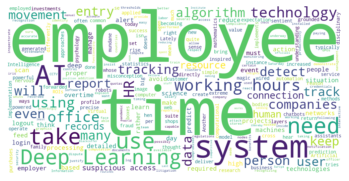

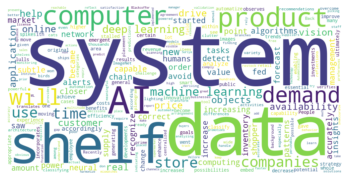

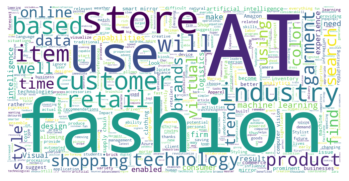

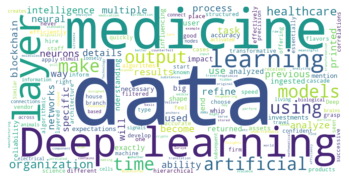

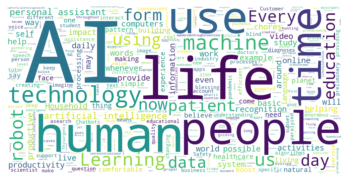

In [55]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=1000, height=500)

#lets try for the first 5 articles
for i in range(0,5):
  article = data["Body Cleaned"][i] 
  wc.generate(article)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis('off')
  plt.show()

These wordclouds are so easy to read and interpret. Anyone who hasn't even seen the blogs can say the first one is about "employees" and maybe tracking their timings or something related to using DL in helping employees save time or track time. Similarly 2nd looks like a "retail/store related writeup", 3rd is definitely fashion-domain based and 4th evidently deals with Data in medicine.

### Sentiment Scores

In [111]:
words = pd.DataFrame(doc_clean) # contains stopword free, punctuation free, lemmatized words with each row representing an article.

In [117]:
#Lets take the first article and analyse 700 unique words used in it.
test_df = words.iloc[0:1,0:700]
df = test_df.transpose()
df["words"]= df[0]  #workaround because .rename isn't working on 0 indexed and zero neamed column
df.drop(df.columns[[0]], axis = 1, inplace = True)
df.head()

,words
0,hen
1,people
2,hear
3,ai
4,often


In [118]:
import re

def clean_text(text):
  if text is not None:  
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip()
    return text
  else: 
    a= " "   #for lines woth None/Nonetypes
    return a  
    
df['words'] = df['words'].map(clean_text) 
df.head()

,words
0,hen
1,people
2,hear
3,ai
4,often


In [119]:
afinn_scorer = Afinn()

df['score'] = df['words'].map(afinn_scorer.score).astype(int)


In [120]:
score_freq = df.score.value_counts().sort_index().to_frame('n')

score_freq

,n
-4,1
-2,5
-1,5
0,673
1,8
2,8


So the article is majorly consisting neutral words, which is justifiable given the reporting nature of the blog. Removing these, we have a handful of polar words which are also either moderately positive or moderately negative.

In [122]:
df = df[df['score'] != 0]
score_freq = df.score.value_counts().sort_index().to_frame('n')

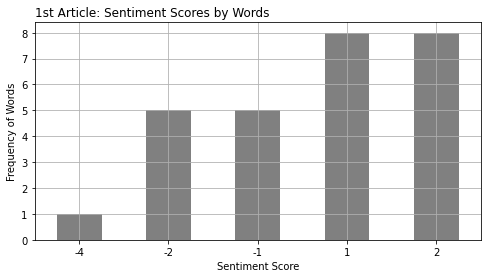

In [123]:
import matplotlib.pyplot as plt

score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=True,
    color='gray')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Words')
plt.title('1st Article: Sentiment Scores by Words', loc='left')
plt.xticks(rotation=0);

Thus, the article is moderately positive in some lines and otherwise majorly neutral in tone.
Such scoring can be done across all articles to get a sense of tone of what the author intends to convey, consciously or unconsciously.